In [2]:
import numpy                as np
import pandas               as pd
# import sklearn              as sk
import time

from sklearn.model_selection import train_test_split

import dirs
from load_dataset           import load_dataset
from preproc                import preproc, dimension_reduction

from bayes                  import gaussian_naive_bayes
from show_class_splits      import show_class_splits
from least_squares          import least_squares, ridge_least_squares
from logistic_regression    import log_reg, ridge_log_reg
from perceptron             import perceptron
from nearest_neighbours     import nearest_neighbours
from decision_trees         import decision_tree, random_forest, ada_boost
from discriminant_analysis  import linear_discriminant_analysis, quadratic_discriminant_analysis
from cross_val_analysis     import cross_val_analysis

from datetime import datetime
from sklearn.model_selection import KFold
import matplotlib.pylab as plt

25592


---- Loading and Preprocessing ----
('\nclassPos: ', 63981)
('classNeg: ', 1245005)


Data loaded with following class distribution: 
Positive class: 0.00 %, 63981 entries 
Negative class: 0.00 %, 63981 entries 
Total:          127962 entries

3 features containing only zeros have been dropped from data.

Train data loaded with following class distributions:
Positive class: 0.00 %, 51079 entries 
Negative class: 0.00 %, 51291 entries 
Total:          102370 entries

Test data loaded with following class distributions:
Positive class: 0.00 %, 12902 entries 
Negative class: 0.00 %, 12690 entries 
Total:          25592 entries
('\nN components:', 97)
('\nPrincipal components to keep: ', 60)
('\nCompact data: ', (127962, 60))


---- Classification ----


LDA
Train Process for 1 Fold
Train Process for 2 Fold


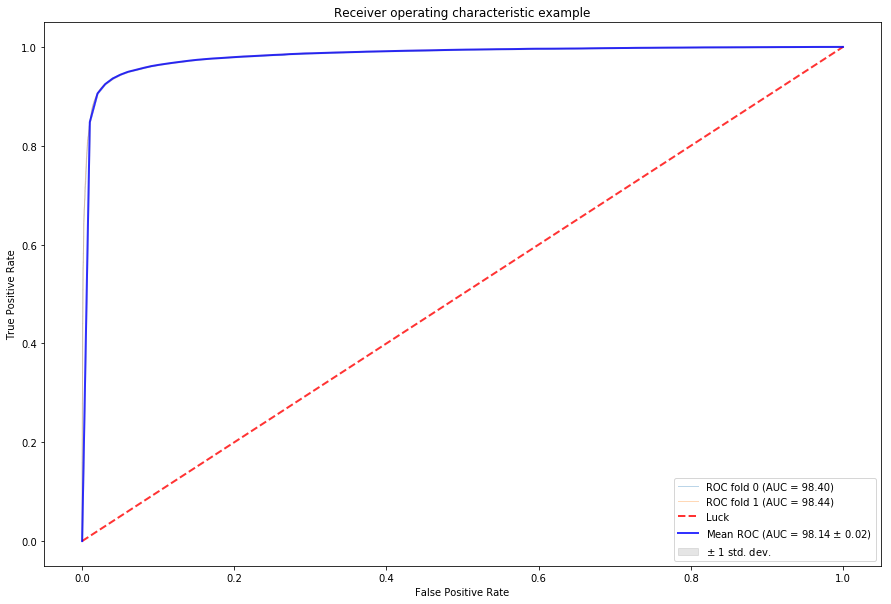

Elapsed: 0:00:01.407477s
Correct predictions 0.9315

QDA
Train Process for 1 Fold
Train Process for 2 Fold


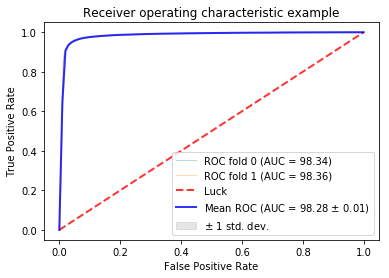

Elapsed: 0:00:02.146570s
Correct predictions 0.9460

Naive Bayes
Train Process for 1 Fold
Train Process for 2 Fold


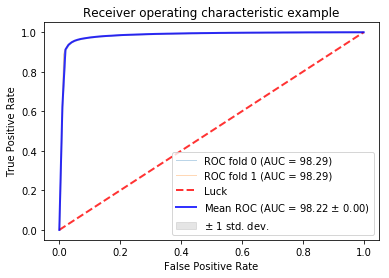

Elapsed: 0:00:00.362990s
Correct predictions 0.9452

Logistic Regression
Train Process for 1 Fold
Train Process for 2 Fold


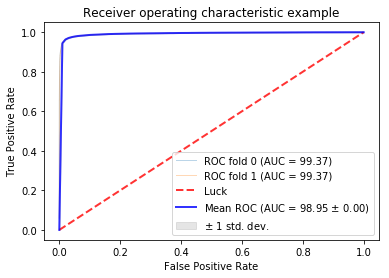

Elapsed: 0:00:05.792700s
Correct predictions 0.9700

Linear Perceptron
Elapsed: 0:00:00.104589s
Correct predictions 0.9700

Decision Tree
Train Process for 1 Fold
Train Process for 2 Fold


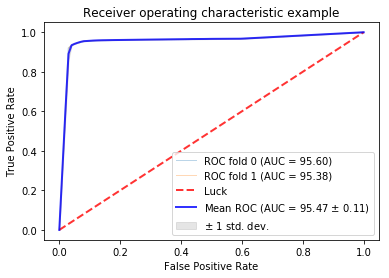

Elapsed: 0:00:37.925340s
Correct predictions 0.9479

Random Forest
Train Process for 1 Fold
Train Process for 2 Fold


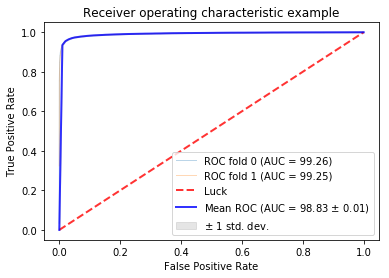

Elapsed: 0:00:17.218388s
Correct predictions 0.9672

AdaBoost
Train Process for 1 Fold
Train Process for 2 Fold


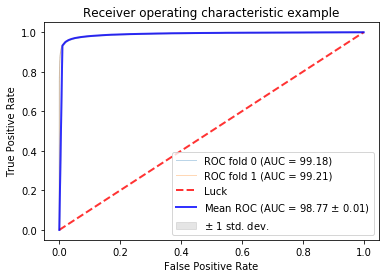

Elapsed: 0:01:44.740493s
Correct predictions 0.9663


In [4]:
fig, ax = plt.subplots(1,figsize=(15,10))
# np.set_printoptions(precision=4)

numPos   = 63981   # Max of    63 981 samples
numNeg   = 63981   # Max of 1 245 005 samples

#numPos   = 20000   # Max of    63 981 samples
#numNeg   = 20000   # Max of 1 245 005 samples
testSize = int((numPos+numNeg)*0.2)
print(testSize)
print("\n\n---- Loading and Preprocessing ----")

dataDf, labels = load_dataset(dirs.dataset, randomState=None, numPos=numPos, numNeg=numNeg)#fracPos=0.02, fracNeg=0.02)
dataDf = preproc(dataDf, verbose=False)
# labeledDf = dataDf.assign(Labels=labels)

trainDf, testDf, y_train, y_test = train_test_split(dataDf, labels, test_size=testSize)

print("\nTrain data loaded with following class distributions:")
show_class_splits(y_train)
print("\nTest data loaded with following class distributions:")
show_class_splits(y_test)

'Principal Components Analysis'
'   useful to reduce dataset dimensionality'
compactDf = dimension_reduction(dataDf, keepComp=60)

print("\n\n---- Classification ----\n")



'Linear Discriminant Classifier'
print("\nLDA")
startTime = datetime.now()
ldaPred,lda = linear_discriminant_analysis(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=lda,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(ldaPred == y_test))/testSize))

'Quadratic Discriminant Classifier'
print("\nQDA")
startTime = datetime.now()
qdaPred,qda = quadratic_discriminant_analysis(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=qda,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(qdaPred == y_test))/testSize))

'Bayesian Classifier'
print("\nNaive Bayes")
startTime = datetime.now()
bayesPred,bayes = gaussian_naive_bayes(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=bayes,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(bayesPred == y_test))/testSize))

'Logistic Regression'
print("\nLogistic Regression")
startTime = datetime.now()
logPred,log = log_reg(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=log,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(logPred == y_test))/testSize))

#@@'Logistic Regression with L2 Regularization'
#@@# TODO: Testar LogisticRegressionCV, que encontra o C otimo
#@@logPenalty = 1/100

#@@print("\nLogistic Regression with L2 Regularization")
#@@startTime = datetime.now()
#@@rlogPred = ridge_log_reg(trainDf, y_train, testDf, y_test, reg=logPenalty)
#@@elapsed = datetime.now() - startTime
#@@print("Elapsed: "+str(elapsed)+"s")
#@@print("Regularization paramenter (smaller is stronger): \n", logPenalty)
#@@print("Correct predictions {:.4f}".format(np.sum(rlogPred == y_test)/testSize))

'Linear Perceptron'
print("\nLinear Perceptron")
startTime = datetime.now()
percepPred,percep = perceptron(trainDf, y_train, testDf, y_test)
#cross_val_analysis(n_split=2,classifier=percep,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(logPred == y_test))/testSize))

# 'Nearest Neighbours'
# start = time.perf_counter()
# knnPred = nearest_neighbours(trainDf, y_train, testDf, y_test)
# elapsed = time.perf_counter() - start
# print("\nNearest Neighbours")
# print("Elapsed: {:.2f}s".format(elapsed))
# print("Correct predictions {:.4f}".format(np.sum(knnPred == y_test)/testSize))

'Decision Tree'
print("\nDecision Tree")
startTime = datetime.now()
treePred,tree = decision_tree(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=tree,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(treePred == y_test))/testSize))

'Random Forest'
print("\nRandom Forest")
startTime = datetime.now()
forestPred,forest = random_forest(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=forest,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(forestPred == y_test))/testSize))

'AdaBoost'
print("\nAdaBoost")
startTime = datetime.now()
adaPred,ada = ada_boost(trainDf, y_train, testDf, y_test)
cross_val_analysis(n_split=2,classifier=ada,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("Correct predictions {:.4f}".format(float(np.sum(adaPred == y_test))/testSize))